# HIERARCHICAL CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,[3,4]].values

In [5]:
import scipy.cluster.hierarchy as sch

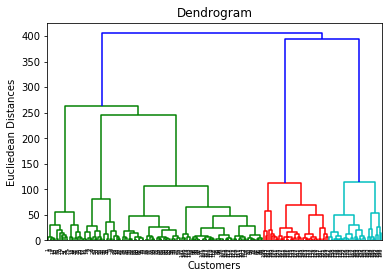

In [6]:
dendrogram = sch.dendrogram(sch.linkage(x,method= 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucliedean Distances")
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [9]:
y_hc = hc.fit_predict(x)

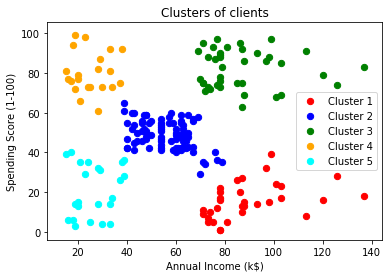

In [10]:
#now lets plot the segments of customers 

plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s = 40 , c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s = 40 , c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s = 40 , c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3,0],x[y_hc == 3,1],s = 40 , c = 'orange', label = 'Cluster 4')
plt.scatter(x[y_hc == 4,0],x[y_hc == 4,1],s = 40 , c = 'cyan', label = 'Cluster 5')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('Clusters of clients')
plt.legend(loc = 'best')

In [11]:
def namming(col):
    val = col
    if val == 0:
        return "Un-reliable"
    elif val == 1 :
        return "Potential Customers"
    elif val == 2 :
        return "Champions"
    elif val == 3 :
        return "Budget Cust"
    elif val == 4 :
        return "inactive"

In [12]:
df['Clusters'] = y_hc

In [13]:
df['Segments']=df['Clusters'].apply(namming)

In [14]:
df.drop(['Clusters'],axis =1 ,inplace = True)

In [15]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Segments
0,1,Male,19,15,39,inactive
1,2,Male,21,15,81,Budget Cust
2,3,Female,20,16,6,inactive
3,4,Female,23,16,77,Budget Cust
4,5,Female,31,17,40,inactive
5,6,Female,22,17,76,Budget Cust
6,7,Female,35,18,6,inactive
7,8,Female,23,18,94,Budget Cust
8,9,Male,64,19,3,inactive
9,10,Female,30,19,72,Budget Cust


In [16]:
pd.value_counts(df['Segments'])

Potential Customers    85
Champions              39
Un-reliable            32
inactive               23
Budget Cust            21
Name: Segments, dtype: int64